In [16]:
from pathlib import Path
import pandas as pd
import pyvista as pv
import numpy as np
import os
from knee_stress_predict.config import raw_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry

# PATIENTS DATA LOADING

This notebook loads data from set_2. Set_2 was provided by Kalin. Raw data for that set is located in data/raw/set_2. The set consists of 28 patients' data that include knee geometry (7 elements) and a pickle file with tibia contact pressure data.

## Loading knee geometry for each patient



In [5]:
patients_knees = {}
data_set_name = "set_2"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

### Number of points, volume and bound size in each structure

Create a Data Frame that shows _______ for each knee structure for all patients:
- size of the point cloud (number of points)
- volume
- bounds for x
- bounds for y
- bounds for z

Below is the example of a point cloud of Tibia bone for Patient 9905863M00

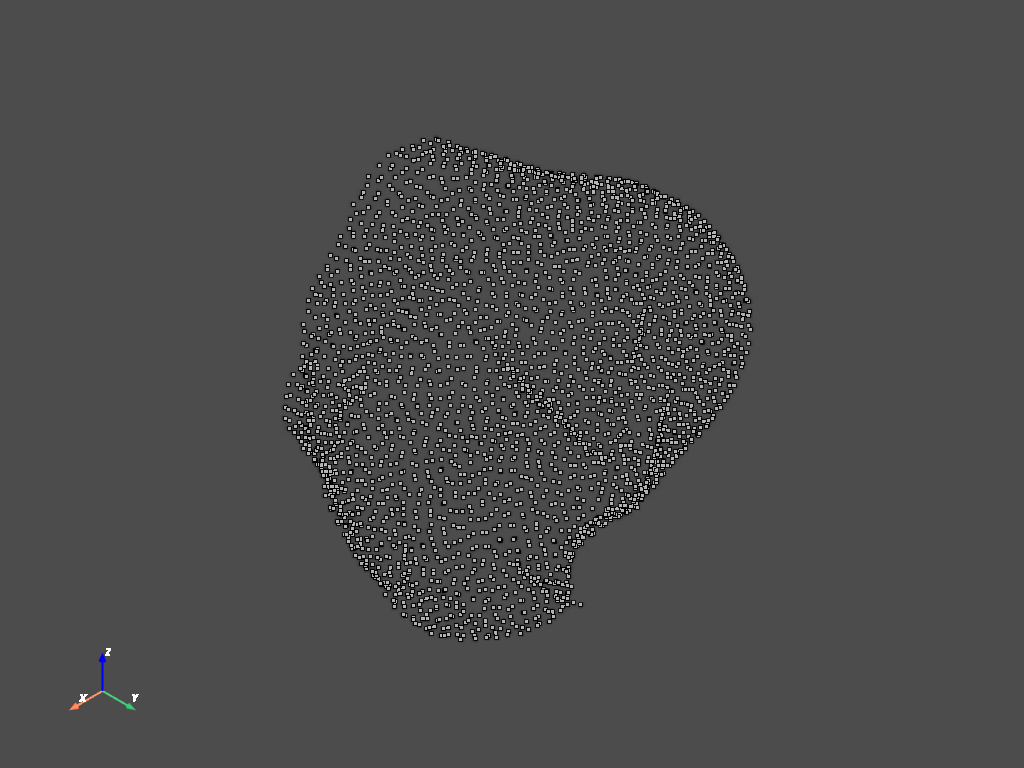

In [10]:
knee = patients_knees["9905863M00"]
tibia_point_cloud = pv.PolyData(knee.tibia.points)
tibia_point_cloud.plot(eye_dome_lighting=True, jupyter_backend="static")

In [15]:
knee_df = pd.DataFrame()

for key, value in patients_knees.items():
    df = {'Code': key,
          'Patella_PN': value.patella.n_points,
          'Femur_PN': value.femur.n_points,
          'Tibia_PN': value.tibia.n_points,
          'Patella_Car_PN': value.pat_cart.n_points,
          'Femur_Car_PN': value.fem_cart.n_points,
          'Tibia_M_Car_PN': value.tibia_cart_med.n_points,
          'Tibia_L_Car_PN': value.tibia_cart_lat.n_points,

          'Patella_volume': value.patella.volume,
          'Femur_volume': value.femur.volume,
          'Tibia_volume': value.tibia.volume,
          'Patella_Car_volume': value.pat_cart.volume,
          'Femur_Car_volume': value.fem_cart.volume,
          'Tibia_M_Car_volume': value.tibia_cart_med.volume,
          'Tibia_L_Car_volume': value.tibia_cart_lat.volume,

        # The form of bounds is: (xmin, xmax, ymin, ymax, zmin, zmax).
          'Patella_bounds_x': abs(value.patella.bounds[0] - value.patella.bounds[1]),
          'Femur_bounds_x': abs(value.femur.bounds[0] - value.femur.bounds[1]),
          'Tibia_bounds_x': abs(value.tibia.bounds[0] - value.tibia.bounds[1]),
          'Patella_Car_bounds_x': abs(value.pat_cart.bounds[0] - value.pat_cart.bounds[1]),
          'Femur_Car_bounds_x': abs(value.fem_cart.bounds[0] - value.fem_cart.bounds[1]),
          'Tibia_M_Car_bounds_x': abs(value.tibia_cart_med.bounds[0] - value.tibia_cart_med.bounds[1]),
          'Tibia_L_Car_bounds_x': abs(value.tibia_cart_lat.bounds[0] - value.tibia_cart_lat.bounds[1]),

          'Patella_bounds_y': abs(value.patella.bounds[2] - value.patella.bounds[3]),
          'Femur_bounds_y': abs(value.femur.bounds[2] - value.femur.bounds[3]),
          'Tibia_bounds_y': abs(value.tibia.bounds[2] - value.tibia.bounds[3]),
          'Patella_Car_bounds_y': abs(value.pat_cart.bounds[2] - value.pat_cart.bounds[3]),
          'Femur_Car_bounds_y': abs(value.fem_cart.bounds[2] - value.fem_cart.bounds[3]),
          'Tibia_M_Car_bounds_y': abs(value.tibia_cart_med.bounds[2] - value.tibia_cart_med.bounds[3]),
          'Tibia_L_Car_bounds_y': abs(value.tibia_cart_lat.bounds[2] - value.tibia_cart_lat.bounds[3]),

          'Patella_bounds_z': abs(value.patella.bounds[4] - value.patella.bounds[5]),
          'Femur_bounds_z': abs(value.femur.bounds[4] - value.femur.bounds[5]),
          'Tibia_bounds_z': abs(value.tibia.bounds[4] - value.tibia.bounds[5]),
          'Patella_Car_bounds_z': abs(value.pat_cart.bounds[4] - value.pat_cart.bounds[5]),
          'Femur_Car_bounds_z': abs(value.fem_cart.bounds[4] - value.fem_cart.bounds[5]),
          'Tibia_M_Car_bounds_z': abs(value.tibia_cart_med.bounds[4] - value.tibia_cart_med.bounds[5]),
          'Tibia_L_Car_bounds_z': abs(value.tibia_cart_lat.bounds[4] - value.tibia_cart_lat.bounds[5]),
          }
    knee_df = knee_df.append(df, ignore_index=True)
knee_df

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Femur_Car_bounds_y,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,48.066266,9.819381,13.747335,27.492164,73.671344,70.012669,17.505247,77.312018,51.821435,38.669460
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,47.016725,7.843438,13.953374,26.860005,72.792441,63.912004,15.834497,76.198050,49.585413,39.525092
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,41.613434,9.992703,13.570709,19.841214,63.757277,51.757118,14.277669,66.848989,42.175751,34.364839
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,40.589075,8.809906,13.458181,20.166843,64.151329,51.898573,13.794617,66.567807,42.911019,33.854403
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,46.886831,15.422482,8.785706,22.540873,70.235115,63.212181,16.312369,74.647781,45.878323,53.532299
5,9912946M12,791,4298,2533,5685,20945,2840,2840,22884.798440,258760.708517,...,46.988974,13.808537,9.145256,24.797586,70.868968,61.794427,17.945412,74.694045,44.778685,54.848365
6,9954040M00,803,3417,2512,5015,20230,2840,2350,23008.003160,182608.626657,...,46.811272,14.648708,13.249430,26.287107,65.060680,57.686642,17.962609,68.861511,41.209505,50.400081
7,9954040M12,812,3233,2740,4885,20345,2840,2360,22994.325369,172181.530610,...,46.083066,14.222025,12.871125,26.083210,65.312921,57.659401,17.280128,69.320039,41.165844,50.319550
8,9958234M00,759,3696,2606,5235,21865,2840,2840,20235.363396,208302.746227,...,45.918056,12.652546,9.159565,21.064244,66.811838,63.803365,12.930812,71.117317,41.892000,50.649900
9,9958234M12,752,3674,2669,5225,22195,2840,2840,20204.268573,207124.042497,...,45.714464,12.363443,7.829719,22.138786,66.978543,65.157606,13.450240,70.870164,42.959333,49.449277


### Distance between femur cartilages and tibia bone

Below is the visualization of the implicit distance between tibia cartilages and the femur bone

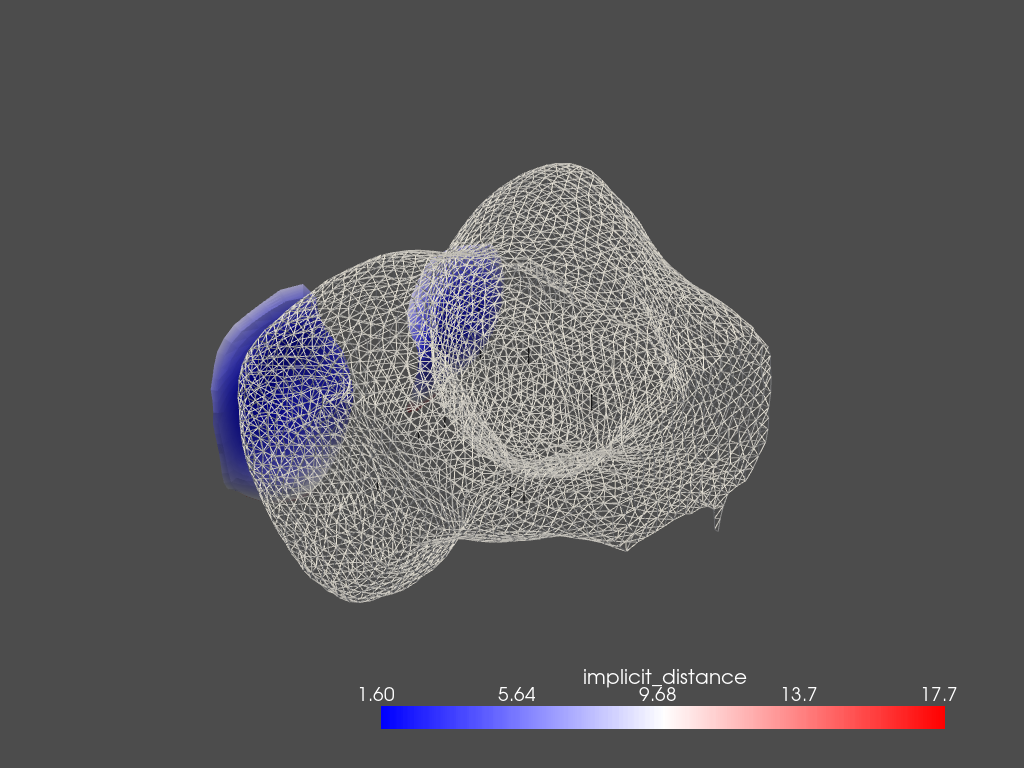

In [14]:
surf_femur = knee.femur.extract_surface()
_ = knee.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
_ = knee.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

pl = pv.Plotter()
_ = pl.add_mesh(knee.tibia_cart_med, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(knee.tibia_cart_lat, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(surf_femur, color='w', style='wireframe')
pl.show(jupyter_backend="static")


In [17]:
implicit_distance_df = pd.DataFrame()

for key, value in patients_knees.items():
      surf_femur = value.femur.extract_surface()
      _ = value.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
      _ = value.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

      impl_dist_tibia_cart_lat = value.tibia_cart_lat.active_scalars
      impl_dist_tibia_cart_med = value.tibia_cart_med.active_scalars

      df = {'Code': key,
            'Max_dist_femur_tibia_lat_car': max(impl_dist_tibia_cart_lat),
            'Min_dist_femur_tibia_lat_car': min(impl_dist_tibia_cart_lat),
            'Mean_dist_femur_tibia_lat_car': np.mean(impl_dist_tibia_cart_lat),
            'Max_dist_femur_tibia_med_car': max(impl_dist_tibia_cart_med),
            'Min_dist_femur_tibia_med_car': min(impl_dist_tibia_cart_med),
            'Mean_dist_femur_tibia_med_car': np.mean(impl_dist_tibia_cart_med),
            }
      implicit_distance_df = implicit_distance_df.append(df, ignore_index=True)
implicit_distance_df

,Code,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car
0,9905863M00,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838
1,9905863M12,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601
2,9908796M00,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267
3,9908796M12,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701
4,9912946M00,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601
5,9912946M12,14.812026,1.317364,4.527756,20.625497,2.362209,6.585939
6,9954040M00,14.405036,1.791824,5.394328,19.520492,1.581902,6.630810
7,9954040M12,14.258336,1.599123,5.315656,20.528995,1.629729,6.670640
8,9958234M00,16.565555,1.481842,5.632349,19.478773,2.755818,7.313583
9,9958234M12,16.466665,1.677136,5.663880,20.177378,2.723724,7.444552
